In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('US_BaBy_Names.csv')
df.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [40]:
df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [37]:
len(df)

1016395

In [15]:
df = df.iloc[:, 2:]
df.head(10)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
5,Abigail,2004,F,AK,37
6,Olivia,2004,F,AK,33
7,Isabella,2004,F,AK,30
8,Alyssa,2004,F,AK,29
9,Sophia,2004,F,AK,28


In [19]:
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [23]:
print('Number of different names:', len(df['Name'].unique()))

Number of different names:  17632


In [31]:
count_name = pd.DataFrame(df['Name'].value_counts()).reset_index()
count_name.columns = ['Name', 'Freq']
count_name.loc[count_name['Freq'] == count_name['Freq'].min()]

,Name,Freq
13950,Taisley,1
13951,Yohance,1
13952,Jilliana,1
13953,Albion,1
13954,Zani,1
...,...,...
17627,Garo,1
17628,Safi,1
17629,Sady,1
17630,Prajna,1


In [33]:
count_name.iloc[:10, :]

,Name,Freq
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049
5,Taylor,1033
6,Jayden,1031
7,Alexis,984
8,Payton,971
9,Dakota,962


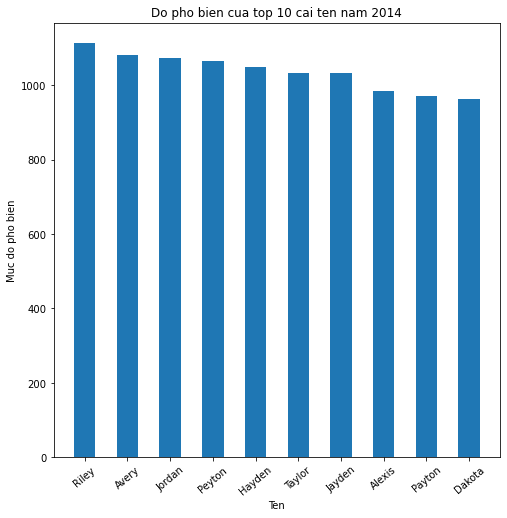

In [63]:
count_name_2014 = df.loc[df['Year'] == 2014, ['Name']].value_counts().reset_index()
count_name_2014.columns = ['Name', 'Freq']
prep_dat = count_name.sort_values('Freq', ascending=False)[:][:10]

plt.figure(figsize=(8, 8))
plt.bar([i for i in range(10)], prep_dat['Freq'], width=0.5)
plt.xlabel('Ten')
plt.xticks([i for i in range(10)], prep_dat['Name'], rotation=40)
plt.ylabel('Muc do pho bien')
plt.title('Do pho bien cua top 10 cai ten nam 2014')
plt.show();

In [88]:
res = pd.DataFrame({'Gender': ['Female', 'Male']})

for i in range(2004, 2015):
    count_gender_per_year = df.loc[df['Year']==i].groupby('Gender').size().reset_index()
    count_gender_per_year.columns = ['Gender', 'Vol']
    res = pd.concat([res, 
                    pd.DataFrame({f'{i}': [count_gender_per_year['Vol'][0]/count_gender_per_year['Vol'].sum(), 
                                          count_gender_per_year['Vol'][1]/count_gender_per_year['Vol'].sum()]})], axis=1)

,Gender,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Female,0.556387,0.555925,0.553914,0.553725,0.553522,0.549493,0.547483,0.547312,0.545257,0.543869,0.542019
1,Male,0.443613,0.444075,0.446086,0.446275,0.446478,0.450507,0.452517,0.452688,0.454743,0.456131,0.457981


In [103]:
res.iloc[0, 1:].shape

(11,)

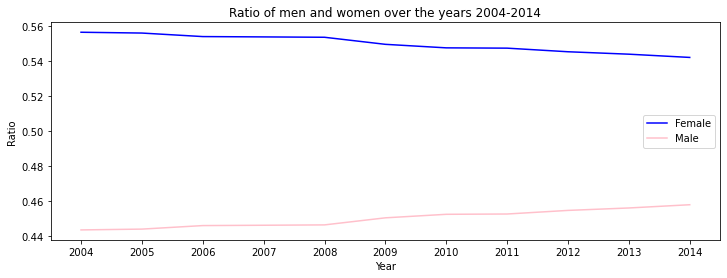

In [108]:
plt.figure(figsize=(12, 4))

    
plt.plot(res.columns[1:], res.iloc[0, 1:], label='Female', color='blue')
plt.plot(res.columns[1:], res.iloc[1, 1:], label='Male', color='pink')  
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of men and women over the years 2004-2014')
plt.legend()
plt.show();

In [112]:
df2 = pd.read_csv('tips.csv')

df2.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [113]:
df2 = df2.iloc[:, 1:]
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [128]:
print('Categorical attributes are:')
print(f'Sex: {df2.sex.unique()} ')
print(f'Smoker: {df2.smoker.unique()}')
print(f'Time: {df2.time.unique()}')
print(f'Day: {df2.day.unique()}')

Categorical attributes are:
Sex: ['Female' 'Male'] 
Smoker: ['No' 'Yes']
Time: ['Dinner' 'Lunch']
Day: ['Sun' 'Sat' 'Thur' 'Fri']


In [195]:
cnt = pd.DataFrame(df2.sex.value_counts().reset_index())
cnt.columns = ['sex', 'vol']
ratio = pd.DataFrame({'ratio': [cnt.iloc[0, 1]/cnt.vol.sum(), cnt.iloc[1, 1]/cnt.vol.sum()]})
cnt = pd.concat([cnt, ratio], axis=1)
cnt

,sex,vol,ratio
0,Male,157,0.643443
1,Female,87,0.356557


In [198]:
num = df2.groupby('smoker').size().reset_index().iloc[1, 1]
rate = num/len(df2)
num, rate

(93, 0.38114754098360654)

In [201]:
cnt = pd.DataFrame(df2.day.value_counts().reset_index())
cnt.columns = ['day', 'freq']
day = cnt.loc[cnt.freq == cnt.freq.max(), ['day']]
rate = cnt.freq.max()/cnt.freq.sum()
day, rate

(   day
 0  Sat,
 0.35655737704918034)

In [177]:
pd.DataFrame(df2.time.value_counts().reset_index()).iloc[0,0]

'Dinner'

In [178]:
df2.size.max()

1708

In [179]:
df2.size.sum()/len(df2)

7.0

In [184]:
arr_tip = np.array(df2.tip)
arr_bill = np.array(df2.total_bill)
rate = sum(arr_tip)/sum(arr_bill)
rate

0.15153580224410024

In [186]:
avg_rate = np.mean(arr_tip/arr_bill)
avg_rate

0.16080258172250472

In [190]:
total_tip_per_sex = pd.DataFrame(df2.groupby('sex').tip.sum().reset_index())
who = total_tip_per_sex.loc[total_tip_per_sex.tip==total_tip_per_sex.tip.max(), ['sex']]
who

,sex
1,Male


In [196]:
cnt.loc[cnt['vol']==cnt['vol'].max(), ['sex']]

,sex
0,Male


In [203]:
total_tip_per_sex = pd.DataFrame(df2.groupby('smoker').tip.sum().reset_index())
who = total_tip_per_sex.loc[total_tip_per_sex.tip==total_tip_per_sex.tip.max(), ['smoker']]
who

,smoker
0,No


In [205]:
smoker = pd.DataFrame(df2.smoker.value_counts().reset_index())
smoker.loc[smoker['smoker']==smoker['smoker'].max(), ['smoker']]

,smoker
0,151
